# Spotify Songs  - Part 2: Classification with sklearn 

This is the second part of a project with a <a href="https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/data#">dataset</a> from Spotify with 235,725 songs, with approximately 10,000 songs per genre. Part 1 explored and visualized the dataset and found that the different genres vary only little in some of the provided variables.

#### Variables
Genre: Genre of the song e.g. Rock, Rap, Electronic
Popularity: Score from 0 to 100
Tempo : Measured in Beats Per Minute <br>
Energy: The energy of a song - the higher the value, the more energtic.<br>
Danceability: The higher the value, the easier it is to dance to this song.<br>
Loudness..dB: The higher the value, the louder the song.<br>
Liveness: The higher the value, the more likely the song is a live recording.<br>
Valence: The higher the value, the more positive mood for the song.<br>
Duration_ms: The duration of the song.<br>
Acousticness:The higher the value the more acoustic the song is.<br>
Speechiness:The higher the value the more spoken word the song contains.<br>
Popularity:The higher the value the more popular the song is.<br>
key: The key the song was composed in e.g. F#, G, A#<br>
mode: The musical scale e.g. minor or major <br>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import svm 
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('SpotifyFeatures.csv', index_col = "track_id")   
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# checking for duplicates and missing values  
test = df.duplicated().sum()
print('The number of duplicates is:',test)

test2 = df.isnull().sum()
print("Missing values by variable:")
print(test2)

The number of duplicates is: 0
Missing values by variable:
genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


#### Dropping two genres
There are too few A capella songs, and Children's Music appeared twice in the original dataset.

In [4]:
df = df[(df.genre != "A Capella") & (df.genre != "Children's Music")]

#### Transformation & Normalization  
'mode'(Minor/Major), 'time_signature' (3/4, 4/4 etc.), get transformed. 'tempo' which is measured in Beats per Minute(BPM) e.g. 160 gets normalized as most other variables are already on a scale from 0 to 1. 

In [5]:
df["mode"] = df["mode"].astype('category')
df['mode_codes'] = df['mode'].cat.codes

df["time_signature"] = df["time_signature"].astype('category')
df['time_signature_codes'] = df['time_signature'].cat.codes

df["key"] = df["key"].astype('category')
df['key_codes'] = df['key'].cat.codes

#### Splitting the data

In [6]:
Y_df = df['genre']

X_df = df.drop(['genre','artist_name','track_name','duration_ms','loudness','key','mode','time_signature'], axis=1)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_df)
X_df = scaling.transform(X_df)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.30, random_state=0, stratify = df['genre'])


### Random Forest 

In [8]:
rf = RandomForestClassifier(n_estimators = 10)

In [9]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [10]:
print(classification_report(y_test,rf_pred))

                  precision    recall  f1-score   support

     Alternative       0.15      0.16      0.15      2779
           Anime       0.44      0.46      0.45      2681
           Blues       0.31      0.36      0.33      2707
Children’s Music       0.04      0.05      0.05      2806
       Classical       0.53      0.55      0.54      2777
          Comedy       0.96      0.94      0.95      2904
         Country       0.30      0.32      0.31      2599
           Dance       0.09      0.08      0.09      2610
      Electronic       0.46      0.47      0.46      2813
            Folk       0.14      0.14      0.14      2790
         Hip-Hop       0.12      0.13      0.12      2788
           Indie       0.04      0.04      0.04      2863
            Jazz       0.30      0.27      0.28      2832
           Movie       0.62      0.59      0.61      2342
           Opera       0.74      0.80      0.77      2484
             Pop       0.10      0.10      0.10      2816
             

### Support Vector Machine

In [11]:
svm = svm.SVC(kernel='poly') 

In [12]:
svm.fit(x_train,y_train)   ### scale -1 to 1 for faster performance
svm_pred = svm.predict(x_test)

C:\Users\imper\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
print(classification_report(y_test,svm_pred))

                  precision    recall  f1-score   support

     Alternative       0.25      0.22      0.23      2779
           Anime       0.47      0.29      0.36      2681
           Blues       0.34      0.31      0.32      2707
Children’s Music       0.22      0.13      0.16      2806
       Classical       0.48      0.48      0.48      2777
          Comedy       0.96      0.93      0.95      2904
         Country       0.25      0.38      0.30      2599
           Dance       0.19      0.16      0.17      2610
      Electronic       0.45      0.50      0.47      2813
            Folk       0.24      0.30      0.27      2790
         Hip-Hop       0.29      0.54      0.38      2788
           Indie       0.18      0.08      0.11      2863
            Jazz       0.31      0.36      0.34      2832
           Movie       0.65      0.48      0.55      2342
           Opera       0.62      0.80      0.70      2484
             Pop       0.30      0.39      0.34      2816
             

### Neural Network

In [14]:
nn = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=250)

In [15]:
nn.fit(x_train,y_train)
nn_pred = nn.predict(x_test)

C:\Users\imper\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
print(classification_report(y_test,nn_pred))

                  precision    recall  f1-score   support

     Alternative       0.27      0.20      0.23      2779
           Anime       0.48      0.38      0.42      2681
           Blues       0.37      0.26      0.31      2707
Children’s Music       0.24      0.13      0.17      2806
       Classical       0.52      0.57      0.54      2777
          Comedy       0.96      0.94      0.95      2904
         Country       0.27      0.43      0.33      2599
           Dance       0.17      0.11      0.14      2610
      Electronic       0.48      0.47      0.47      2813
            Folk       0.26      0.29      0.27      2790
         Hip-Hop       0.32      0.29      0.30      2788
           Indie       0.20      0.11      0.14      2863
            Jazz       0.33      0.30      0.31      2832
           Movie       0.65      0.52      0.58      2342
           Opera       0.69      0.84      0.76      2484
             Pop       0.26      0.47      0.34      2816
             

### Why is the performance so poor? 

Let's visualize the mean value of each genre across all variables, and see if the problem discovered in Part 1 extends to more variables. For that we need to get tempo and the code variables on a scale from 0 to 1 like most other variables already are.

In [17]:
df2 = df 
df2.reset_index(level=0, inplace=True)

df_temp = pd.DataFrame(df2['tempo'])
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df_temp)
df2['tempo'] = pd.DataFrame(scaled)

df_temp = pd.DataFrame(df2['popularity'])
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df_temp)
df2['popularity'] = pd.DataFrame(scaled)

df_temp = pd.DataFrame(df2['time_signature_codes'])
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df_temp)
df2['time_signature_codes'] = pd.DataFrame(scaled)

df_temp = pd.DataFrame(df2['key_codes'])
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df_temp)
df2['key_codes'] = pd.DataFrame(scaled)

df2 = df2.drop(['track_id','artist_name','track_name','duration_ms','key','mode','time_signature','loudness'], axis = 1)

In [18]:
df3 = df2.groupby(['genre']).mean()
df3.reset_index(level=0, inplace=True)

In [19]:
df3 = pd.melt(df3, "genre", var_name="measurement")

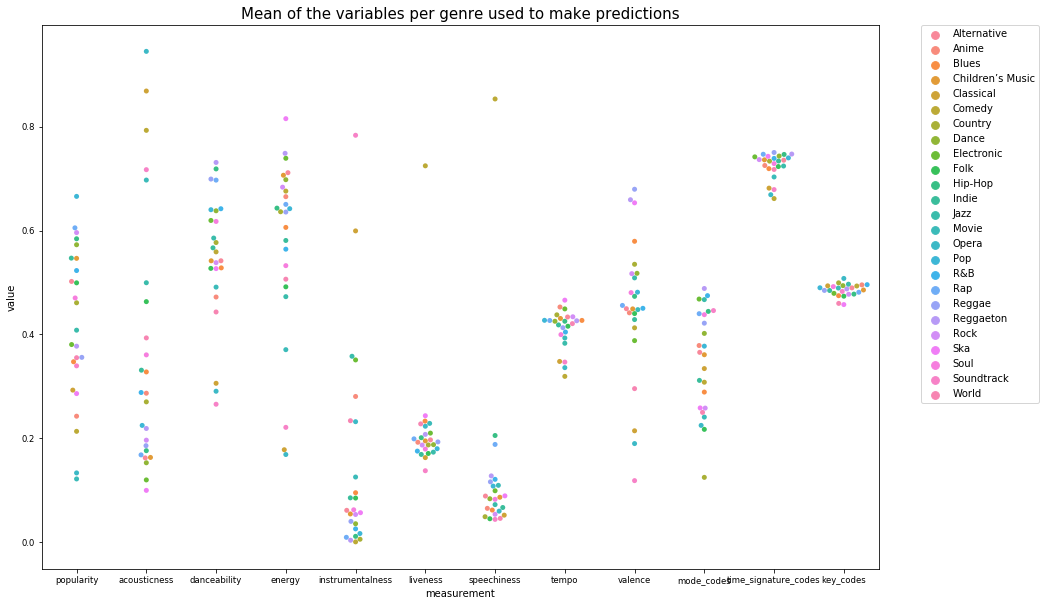

In [20]:
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(labelsize = 8.5)
ax.set_title('Mean of the variables per genre used to make predictions', fontsize = 15)
sns.swarmplot(x="measurement", y="value", hue="genre",data=df3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
